# Загрузка данных

In [1]:
import pandas as pd
import os

In [2]:
fname = os.path.join("Dataset_visits_clear.xlsx")
data = pd.read_excel(fname)
data.head()

,Идентификатор визита,"Идентификаторы просмотров, которые были в данном визите",Дата и время визита,Страница входа,Страница выхода,Количество просмотренных страниц,Время на сайте,Отказность портала
0,5.945968e+18,"[5945968348615282573,5945969237801111437]",2016-01-01 12:47:07,https://mos.ru/newyear/place_type,https://mos.ru/news/,2,233,0
1,5.945743e+18,[5945742643641253769],2015-12-31 21:28:44,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,14,0
2,5.945745e+18,[5945744916521625453],2015-12-31 21:37:59,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,15,0
3,5.945852e+18,"[5945851861522030292,5945853690184722272]",2016-01-01 04:53:08,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,2,460,0
4,5.945950e+18,[5945949749967062873],2016-01-01 11:31:27,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,28,0


# Проведение анализа

In [3]:
import numpy as np
from collections import Counter
import datetime as dt
import matplotlib.pyplot as plt

#### 1. С каких страниц чаще всего заходят на сайт?

In [4]:
entries = Counter(data['Страница входа'])
entries.most_common()

[('https://mos.ru/newyear/place_type', 28),
 ('https://mos.ru/', 27),
 ('https://mos.ru/news/', 7),
 ('https://mos.ru/newyear/article/4242073', 4),
 ('https://mos.ru/news/article/5334073', 2),
 ('https://mos.ru/advisor/reception', 2),
 ('https://mos.ru/newyear/place_type/2085', 2),
 ('https://mos.ru/authority/structure/', 2),
 ('https://mos.ru/authority/documents/doc/33686220', 2),
 ('https://mos.ru/newyear/event/9113088', 1),
 ('https://mos.ru/?result_43=2', 1),
 ('https://mos.ru/newyear/event/8594088', 1),
 ('https://mos.ru/mayor/themes', 1),
 ('https://mos.ru/newyear/event/8007088', 1),
 ('https://mos.ru/newyear/event/8256088', 1),
 ('https://mos.ru/news/article/5388073', 1),
 ('https://mos.ru/newyear/place/7500', 1),
 ('https://mos.ru/calendar/', 1),
 ('https://mos.ru/news/article/4774073', 1),
 ('https://mos.ru/newyear/article/4244073', 1),
 ('https://mos.ru/calendar/event/8770088/', 1),
 ('https://mos.ru/authority/structure/19686090/person/19719093', 1),
 ('https://mos.ru/news/ar

In [5]:
common_pages = [i for i in entries if entries[i] > 5]
common_pages

['https://mos.ru/newyear/place_type',
 'https://mos.ru/',
 'https://mos.ru/news/']

#### 2. Сколько в среднем времени проводят на сайте за один визит? 

In [6]:
clean_time = data[data['Время на сайте'] != 0]['Время на сайте']
clean_time = clean_time.reset_index(drop=True)
clean_time.head(10)

0    233
1     14
2     15
3    460
4     28
5    525
6     28
7    915
8     29
9    111
Name: Время на сайте, dtype: int64

In [7]:
time_ave = np.average(clean_time)
time_ave.round(2)

109.42

In [8]:
(time_ave/60).round(2)

1.82

In [9]:
min(clean_time)

4

In [10]:
max(clean_time)

2397

In [11]:
round(max(clean_time)/60, 2)

39.95

In [12]:
clean_time = clean_time/60
clean_time.head(10)

0     3.883333
1     0.233333
2     0.250000
3     7.666667
4     0.466667
5     8.750000
6     0.466667
7    15.250000
8     0.483333
9     1.850000
Name: Время на сайте, dtype: float64

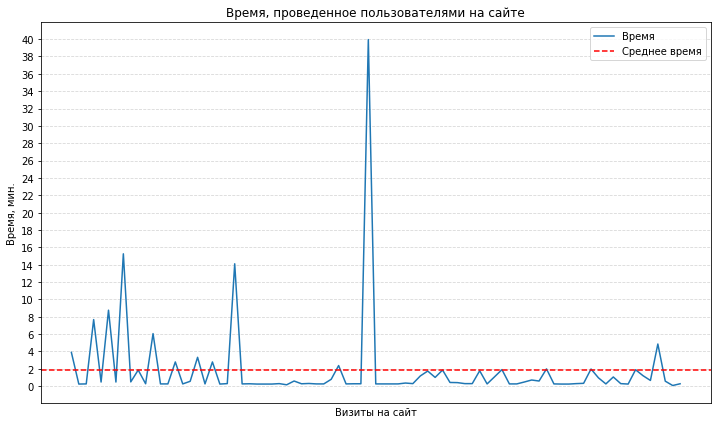

In [13]:
plt.figure(figsize=(12, 7))
plt.title('Время, проведенное пользователями на сайте')
plt.plot(clean_time, label='Время')
plt.axhline(time_ave/60, color='red', linestyle='--', label='Среднее время')
plt.xlabel('Визиты на сайт')
plt.ylabel('Время, мин.')
plt.grid(alpha=0.5, linestyle='--')
plt.xticks([])
plt.yticks(range(0, round(max(clean_time))+2, 2));
plt.legend();

#### 3. Сколько в среднем страниц просматривают за один визит на сайт?

In [14]:
clean_pages = data[data['Время на сайте'] != 0]['Количество просмотренных страниц']
clean_pages = clean_pages.reset_index(drop=True)
clean_pages.head(10)

0     2
1     1
2     1
3     2
4     1
5     5
6     1
7    10
8     1
9     1
Name: Количество просмотренных страниц, dtype: int64

In [15]:
pages_ave = np.average(clean_pages)
pages_ave.round(2)

1.83

In [16]:
min(clean_pages)

1

In [17]:
max(clean_pages)

10

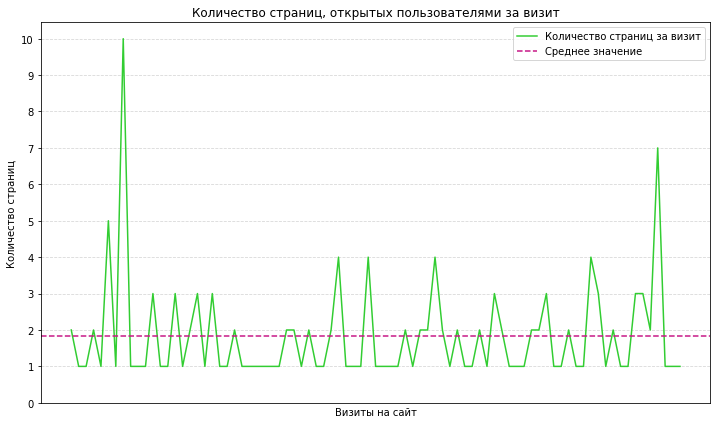

In [18]:
plt.figure(figsize=(12, 7))
plt.title('Количество страниц, открытых пользователями за визит')
plt.plot(clean_pages, color='limegreen', label='Количество страниц за визит')
plt.axhline(pages_ave, color='mediumvioletred', linestyle='--', label='Среднее значение')
plt.xlabel('Визиты на сайт')
plt.ylabel('Количество страниц')
plt.grid(alpha=0.5, linestyle='--')
plt.xticks([])
plt.yticks(range(max(clean_pages)+1));
plt.legend();

#### 4. Сколько в среднем времени уходит на просмотр одной страницы?

In [19]:
time_one = (time_ave/pages_ave)
time_one.round(2)

59.75

In [20]:
aver_one = clean_time/clean_pages
aver_one.head(10)

0    1.941667
1    0.233333
2    0.250000
3    3.833333
4    0.466667
5    1.750000
6    0.466667
7    1.525000
8    0.483333
9    1.850000
dtype: float64

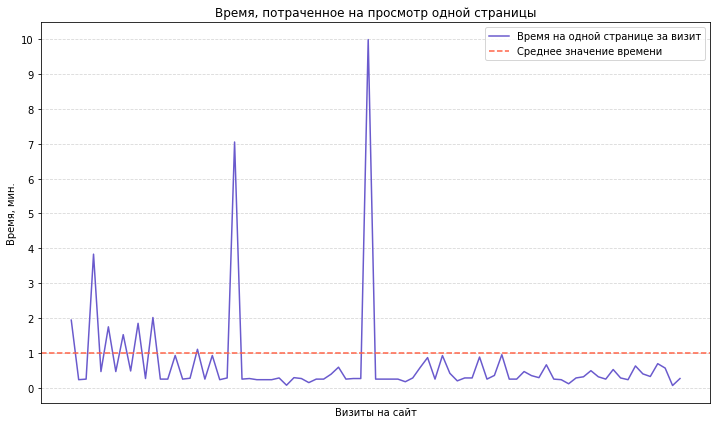

In [21]:
plt.figure(figsize=(12, 7))
plt.title('Время, потраченное на просмотр одной страницы')
plt.plot(aver_one, color='slateblue', label='Время на одной странице за визит')
plt.axhline(time_one/60, color='tomato', linestyle='--', label='Среднее значение времени')
plt.xlabel('Визиты на сайт')
plt.ylabel('Время, мин.')
plt.grid(alpha=0.5, linestyle='--')
plt.xticks([])
plt.yticks(range(round(max(aver_one))+1));
plt.legend();

#### 5. В каком промежутке времени производится наибольшее и наименьшее количество визитов?

In [22]:
data['Время визита (час)'] = pd.to_datetime(data['Дата и время визита']).dt.hour
data.head()

,Идентификатор визита,"Идентификаторы просмотров, которые были в данном визите",Дата и время визита,Страница входа,Страница выхода,Количество просмотренных страниц,Время на сайте,Отказность портала,Время визита (час)
0,5.945968e+18,"[5945968348615282573,5945969237801111437]",2016-01-01 12:47:07,https://mos.ru/newyear/place_type,https://mos.ru/news/,2,233,0,12
1,5.945743e+18,[5945742643641253769],2015-12-31 21:28:44,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,14,0,21
2,5.945745e+18,[5945744916521625453],2015-12-31 21:37:59,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,15,0,21
3,5.945852e+18,"[5945851861522030292,5945853690184722272]",2016-01-01 04:53:08,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,2,460,0,4
4,5.945950e+18,[5945949749967062873],2016-01-01 11:31:27,https://mos.ru/newyear/place_type,https://mos.ru/newyear/place_type,1,28,0,11


In [23]:
hour_vis = Counter(data['Время визита (час)'])
hour_vis

Counter({1: 3,
         2: 1,
         4: 1,
         6: 2,
         7: 8,
         8: 7,
         9: 4,
         10: 9,
         11: 6,
         12: 8,
         13: 4,
         14: 3,
         15: 7,
         16: 4,
         17: 4,
         18: 5,
         19: 7,
         20: 6,
         21: 3,
         22: 3,
         23: 5})

In [24]:
hv = pd.DataFrame.from_dict(hour_vis, orient='index').rename(columns={0:'Визиты'})

In [25]:
df = pd.DataFrame(columns=['Визиты'])
for i in range(0, 24):
  if not i in hv.index:
    df.loc[i] = 0

In [26]:
hv = hv.append(df).sort_index()
hv.head(10)

,Визиты
0,0
1,3
2,1
3,0
4,1
5,0
6,2
7,8
8,7
9,4


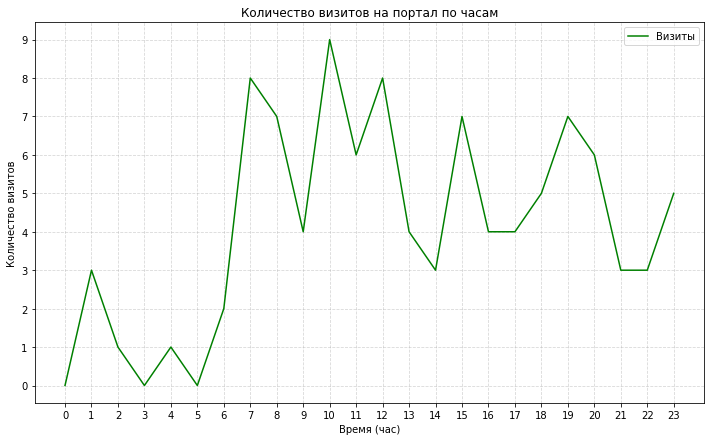

In [27]:
plt.figure(figsize=(12, 7))
plt.title('Количество визитов на портал по часам')
plt.plot(hv, color='green', label='Визиты')
plt.xlabel('Время (час)')
plt.ylabel('Количество визитов')
plt.grid(alpha=0.5, linestyle='--')
plt.xticks(hv.index)
plt.yticks(range(max(hv['Визиты'])+1))
plt.legend();

#### 6. В каком промежутке времени чаще всего наблюдается отказность портала?

In [28]:
data_deny = data[data['Отказность портала'] == 1]
deny_hrs = Counter(data_deny['Время визита (час)'])
deny_hrs

Counter({1: 2,
         6: 1,
         7: 1,
         8: 2,
         10: 1,
         11: 1,
         12: 1,
         13: 1,
         15: 3,
         16: 3,
         19: 1,
         23: 1})

In [29]:
dh = pd.DataFrame.from_dict(deny_hrs, orient='index').rename(columns={0:'Отказы'})

In [30]:
df1 = pd.DataFrame(columns=['Отказы'])
for i in range(0, 24):
  if not i in dh.index:
    df1.loc[i] = 0

In [31]:
dh = dh.append(df1).sort_index()
dh.head(10)

,Отказы
0,0
1,2
2,0
3,0
4,0
5,0
6,1
7,1
8,2
9,0


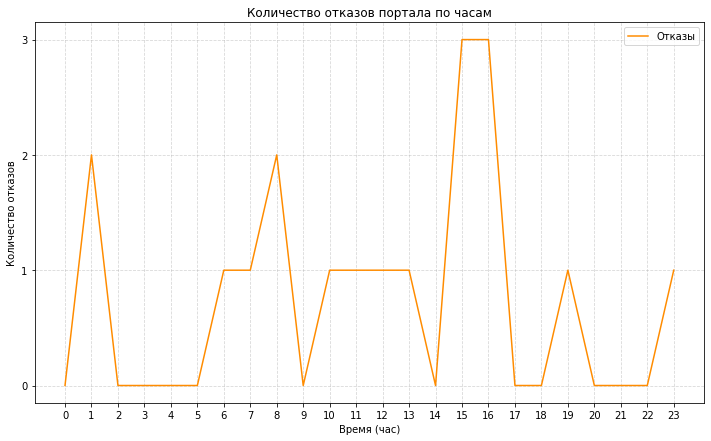

In [32]:
plt.figure(figsize=(12, 7))
plt.title('Количество отказов портала по часам')
plt.plot(dh, color='darkorange', label='Отказы')
plt.xlabel('Время (час)')
plt.ylabel('Количество отказов')
plt.grid(alpha=0.5, linestyle='--')
plt.xticks(dh.index)
plt.yticks(range(max(dh['Отказы'])+1))
plt.legend();

#### 7. Связаны ли промежутки наибольшей посещаемости портала с промежутками его отказности?

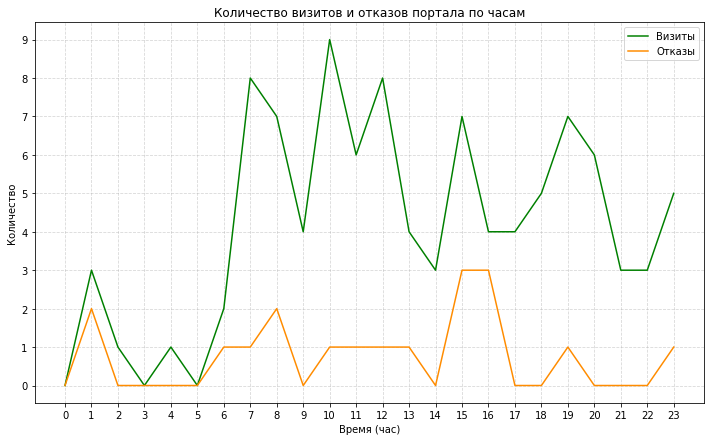

In [33]:
plt.figure(figsize=(12, 7))
plt.title('Количество визитов и отказов портала по часам')
plt.plot(hv, color='green', label='Визиты')
plt.plot(dh, color='darkorange', label='Отказы')
plt.xlabel('Время (час)')
plt.ylabel('Количество')
plt.grid(alpha=0.5, linestyle='--')
plt.xticks(hv.index)
plt.yticks(range(max(hv['Визиты'])+1))
plt.legend();